In [1]:
%matplotlib inline

In [2]:
import numpy as np
import sympy as sym
import seaborn as sn

import pycollocation

<h1> The Solow model </h1>

$$ \dot{k}(t) = s f(k(t)) - (g + n + \delta) k(t),\ k(0) = k_0 $$

In [3]:
# define some variables
t, k, c = sym.symbols('t, k, c')

In [7]:
# define some variables
t, k, c = sym.symbols('t, k, c')

# define some parameters
alpha, sigma = sym.symbols('alpha, sigma')
rho, theta = sym.symbols('rho, theta')
g, n, s, delta = sym.symbols('g, n, s, delta')

# intensive output has the CES form
y = (alpha * k**((sigma - 1) / sigma) + (1 - alpha))**(sigma / (sigma - 1))

# define the equation of motion for capital stock
k_dot = s * y - (g + n + delta) * k
rhs = {'k': k_dot}

# specify some boundary conditions
k0 = 1.0
bcs = {'lower': [k - k0], 'upper': None}  # hopefully this will work!

solow_params = {'g': 0.02, 's': 0.1, 'n': 0.02, 'alpha': 0.15, 'sigma': 2.0,
                'delta': 0.04}

In [8]:
solow = pycollocation.SymbolicBoundaryValueProblem(dependent_vars=['k'],
                                                   independent_var='t',
                                                   rhs=rhs,
                                                   boundary_conditions=bcs,
                                                   params=solow_params)

In [9]:
solow_solver = pycollocation.OrthogonalPolynomialSolver(solow)

In [11]:
def steady_state_capital(g, n, s, alpha, delta, sigma):
    """Steady state value for capital stock (per unit effective labor)."""
    rho = (sigma - 1) / sigma
    return ((1 - alpha) / (((g + n + delta) / s)**rho - alpha))**(1 / rho)

domain = [0, 100]
kstar = steady_state_capital(**solow_params)
ts = np.linspace(domain[0], domain[1], 1000)
ks = kstar - (kstar - k0) * np.exp(-ts)

initial_poly = np.polynomial.Chebyshev.fit(ts, ks, 15, domain)
initial_coefs = {'k': initial_poly.coef}


In [12]:
solow_solver.solve(kind="Chebyshev",
                   coefs_dict=initial_coefs,
                   domain=domain)

In [13]:
solow_solution = pycollocation.solutions.Solution(solow_solver)

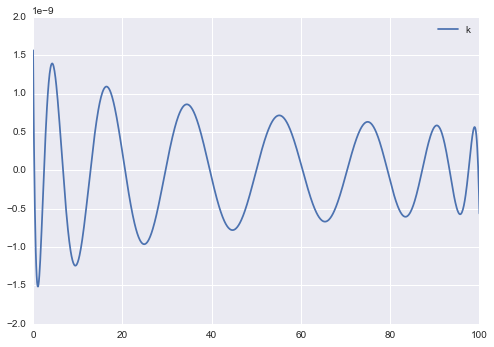

In [14]:
solow_solution.interpolation_knots = np.linspace(0, 100, 1000)
solow_solution.residuals.plot()

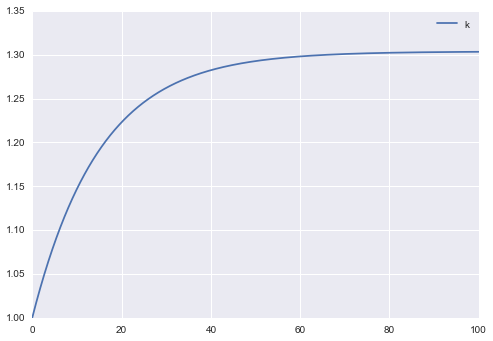

In [15]:
solow_solution.solution.plot()